# 03 Vanilla Policy Gradient with rewards as weights

#### 👉🏽 The policy network will have the following architecture:

<img src="https://github.com/Paulescu/hands-on-rl/blob/main/04_lunar_lander/images/policy_network.svg?raw=True" width="300"/>

#### 👉🏽 And we will use the rewards to compute the weights in the policy gradient formula.

In [30]:
%load_ext autoreload
%autoreload 2
%pylab inline
%config InlineBackend.figure_format = 'svg'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Populating the interactive namespace from numpy and matplotlib


## Environment 🚀🌙

In [41]:
!pip install pygame
!pip install gymnasium
!pip install gym
!pip install Box2D

In [42]:
from google.colab import drive
drive.mount('/content/drive')
import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks/CAS_AML_RL/hands_on/04_lunar_lander/notebooks/')  # Add the parent directory to the path

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
import gym
env = gym.make('LunarLander-v2')
ENV_NAME = 'LunarLander-v2'

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


## Create agent and set hyperparameters

In [46]:
from src.vpg_agent import VPGAgent

agent = VPGAgent(
    env_name=ENV_NAME,
    learning_rate=3e-3,
    hidden_layers=[16, 16],
    gradient_weights='rewards',
)

Policy network with 484 parameters
Sequential(
  (0): Linear(in_features=8, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=16, bias=True)
  (3): ReLU()
  (4): Linear(in_features=16, out_features=4, bias=True)
)


## Tensorboard logger to see training metrics

In [47]:
from src.utils import get_agent_id
agent_id = get_agent_id(ENV_NAME)
print(f'agent_id = {agent_id}')

# tensorboard logger to see training curves
from src.utils import get_logger, get_model_path
logger = get_logger(env_name=ENV_NAME, agent_id=agent_id)

# path to save policy network weights and hyperparameters
model_path = get_model_path(env_name=ENV_NAME, agent_id=agent_id)

agent_id = 6


## Training 🏋️

In [48]:
agent.train(
    n_policy_updates=500,
    batch_size=256,
    logger=logger,
    model_path=model_path,
)

/usr/local/lib/python3.10/dist-packages/gym/core.py:256: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


epoch:   0 	 loss: -209.757 	 reward: -151.172
epoch:   1 	 loss: -258.515 	 reward: -181.459
epoch:   2 	 loss: -360.298 	 reward: -240.051
epoch:   3 	 loss: -312.914 	 reward: -230.867
epoch:   4 	 loss: -334.979 	 reward: -228.449
epoch:   5 	 loss: -215.891 	 reward: -151.628
epoch:   6 	 loss: -321.730 	 reward: -216.302
epoch:   7 	 loss: -202.456 	 reward: -132.458
epoch:   8 	 loss: -423.275 	 reward: -314.934
epoch:   9 	 loss: -157.445 	 reward: -108.393


100%|██████████| 100/100 [00:06<00:00, 14.38it/s]


Best model! Average reward = -205.08, Success rate = 0.00%
epoch:  10 	 loss: -242.453 	 reward: -151.967
epoch:  11 	 loss: -297.011 	 reward: -197.046
epoch:  12 	 loss: -125.265 	 reward: -101.495
epoch:  13 	 loss: -359.707 	 reward: -263.036
epoch:  14 	 loss: -249.170 	 reward: -194.942
epoch:  15 	 loss: -176.905 	 reward: -128.093
epoch:  16 	 loss: -220.075 	 reward: -151.899
epoch:  17 	 loss: -440.752 	 reward: -275.535
epoch:  18 	 loss: -148.187 	 reward: -105.787
epoch:  19 	 loss: -334.780 	 reward: -222.131


100%|██████████| 100/100 [00:07<00:00, 12.68it/s]


Best model! Average reward = -169.41, Success rate = 0.00%
epoch:  20 	 loss: -276.172 	 reward: -196.653
epoch:  21 	 loss: -446.122 	 reward: -326.425
epoch:  22 	 loss: -312.651 	 reward: -238.884
epoch:  23 	 loss: -162.666 	 reward: -116.041
epoch:  24 	 loss: -317.879 	 reward: -213.661
epoch:  25 	 loss: -259.925 	 reward: -180.141
epoch:  26 	 loss: -243.116 	 reward: -163.219
epoch:  27 	 loss: -366.852 	 reward: -262.277
epoch:  28 	 loss: -389.687 	 reward: -274.779
epoch:  29 	 loss: -295.253 	 reward: -195.328


100%|██████████| 100/100 [00:07<00:00, 14.06it/s]


epoch:  30 	 loss: -178.866 	 reward: -126.793
epoch:  31 	 loss: -50.378 	 reward: -52.442
epoch:  32 	 loss: -152.587 	 reward: -103.607
epoch:  33 	 loss: -325.345 	 reward: -206.218
epoch:  34 	 loss: -310.640 	 reward: -226.257
epoch:  35 	 loss: -174.358 	 reward: -127.316
epoch:  36 	 loss: -347.937 	 reward: -220.325
epoch:  37 	 loss: -343.698 	 reward: -229.638
epoch:  38 	 loss: -286.477 	 reward: -208.221
epoch:  39 	 loss: -156.823 	 reward: -116.281


100%|██████████| 100/100 [00:08<00:00, 11.93it/s]


epoch:  40 	 loss: -333.780 	 reward: -227.915
epoch:  41 	 loss: -445.671 	 reward: -318.876
epoch:  42 	 loss: -350.562 	 reward: -249.201
epoch:  43 	 loss: -273.033 	 reward: -188.503
epoch:  44 	 loss: -250.011 	 reward: -185.924
epoch:  45 	 loss: -349.078 	 reward: -207.803
epoch:  46 	 loss: -141.563 	 reward: -99.886
epoch:  47 	 loss: -146.105 	 reward: -105.267
epoch:  48 	 loss: -276.672 	 reward: -180.225
epoch:  49 	 loss: -217.828 	 reward: -154.444


100%|██████████| 100/100 [00:07<00:00, 12.87it/s]


Best model! Average reward = -164.65, Success rate = 0.00%
epoch:  50 	 loss: -167.953 	 reward: -119.044
epoch:  51 	 loss: -171.318 	 reward: -125.873
epoch:  52 	 loss: -141.592 	 reward: -101.173
epoch:  53 	 loss: -364.936 	 reward: -272.717
epoch:  54 	 loss: -174.226 	 reward: -130.804
epoch:  55 	 loss: -381.504 	 reward: -286.979
epoch:  56 	 loss: -411.220 	 reward: -273.992
epoch:  57 	 loss: -229.156 	 reward: -145.521
epoch:  58 	 loss: -296.971 	 reward: -215.699
epoch:  59 	 loss: -160.777 	 reward: -115.344


100%|██████████| 100/100 [00:08<00:00, 11.58it/s]


epoch:  60 	 loss: -325.331 	 reward: -233.356
epoch:  61 	 loss: -215.159 	 reward: -153.863
epoch:  62 	 loss: -274.725 	 reward: -194.488
epoch:  63 	 loss: -178.318 	 reward: -123.646
epoch:  64 	 loss: -390.958 	 reward: -254.225
epoch:  65 	 loss: -161.702 	 reward: -115.931
epoch:  66 	 loss: -238.723 	 reward: -171.274
epoch:  67 	 loss: -176.553 	 reward: -122.599
epoch:  68 	 loss: -234.530 	 reward: -160.857
epoch:  69 	 loss: -186.003 	 reward: -119.502


100%|██████████| 100/100 [00:06<00:00, 15.25it/s]


Best model! Average reward = -142.06, Success rate = 0.00%
epoch:  70 	 loss: -314.329 	 reward: -224.178
epoch:  71 	 loss: -249.267 	 reward: -175.600
epoch:  72 	 loss: -310.989 	 reward: -219.347
epoch:  73 	 loss: -147.377 	 reward: -104.153
epoch:  74 	 loss: -284.715 	 reward: -207.817
epoch:  75 	 loss: -107.954 	 reward: -75.313
epoch:  76 	 loss: -193.829 	 reward: -143.336
epoch:  77 	 loss: -176.151 	 reward: -125.308
epoch:  78 	 loss: -357.510 	 reward: -257.155
epoch:  79 	 loss: -99.379 	 reward: -90.993


100%|██████████| 100/100 [00:07<00:00, 13.56it/s]


epoch:  80 	 loss: -161.231 	 reward: -119.399
epoch:  81 	 loss: -243.771 	 reward: -183.722
epoch:  82 	 loss: -395.455 	 reward: -251.572
epoch:  83 	 loss: -197.986 	 reward: -142.642
epoch:  84 	 loss: -286.606 	 reward: -186.454
epoch:  85 	 loss: -199.180 	 reward: -144.089
epoch:  86 	 loss: -248.912 	 reward: -188.370
epoch:  87 	 loss: -295.503 	 reward: -196.926
epoch:  88 	 loss: -273.007 	 reward: -205.781
epoch:  89 	 loss: -130.924 	 reward: -92.986


100%|██████████| 100/100 [00:11<00:00,  8.62it/s]


epoch:  90 	 loss: -222.839 	 reward: -156.350
epoch:  91 	 loss: -290.398 	 reward: -199.240
epoch:  92 	 loss: -253.452 	 reward: -199.461
epoch:  93 	 loss: -295.340 	 reward: -214.804
epoch:  94 	 loss: -283.470 	 reward: -196.857
epoch:  95 	 loss: -366.239 	 reward: -233.419
epoch:  96 	 loss: -399.399 	 reward: -286.608
epoch:  97 	 loss: -247.342 	 reward: -180.131
epoch:  98 	 loss: -219.562 	 reward: -142.020
epoch:  99 	 loss: -76.119 	 reward: -57.091


100%|██████████| 100/100 [00:07<00:00, 13.09it/s]


epoch: 100 	 loss: -194.737 	 reward: -142.448
epoch: 101 	 loss: -173.807 	 reward: -120.137
epoch: 102 	 loss: -214.211 	 reward: -157.703
epoch: 103 	 loss: -248.824 	 reward: -173.124
epoch: 104 	 loss: -478.075 	 reward: -343.943
epoch: 105 	 loss: -274.498 	 reward: -194.145
epoch: 106 	 loss: -274.852 	 reward: -204.813
epoch: 107 	 loss: -168.999 	 reward: -120.486
epoch: 108 	 loss: -226.986 	 reward: -161.763
epoch: 109 	 loss: -312.029 	 reward: -203.513


100%|██████████| 100/100 [00:06<00:00, 15.20it/s]


epoch: 110 	 loss: -441.944 	 reward: -295.776
epoch: 111 	 loss: -358.345 	 reward: -252.694
epoch: 112 	 loss: -221.858 	 reward: -152.798
epoch: 113 	 loss: -207.869 	 reward: -143.257
epoch: 114 	 loss: -218.943 	 reward: -153.339
epoch: 115 	 loss: -178.206 	 reward: -128.425
epoch: 116 	 loss: -147.903 	 reward: -108.032
epoch: 117 	 loss: -151.783 	 reward: -101.523
epoch: 118 	 loss: -266.765 	 reward: -169.563
epoch: 119 	 loss: -180.863 	 reward: -130.908


100%|██████████| 100/100 [00:08<00:00, 12.30it/s]


epoch: 120 	 loss: -252.924 	 reward: -176.656
epoch: 121 	 loss: -269.915 	 reward: -193.913
epoch: 122 	 loss: -306.654 	 reward: -221.991
epoch: 123 	 loss: -337.563 	 reward: -262.238
epoch: 124 	 loss: -154.738 	 reward: -120.102
epoch: 125 	 loss: -136.990 	 reward: -91.881
epoch: 126 	 loss: -354.427 	 reward: -231.098
epoch: 127 	 loss: -197.731 	 reward: -152.666
epoch: 128 	 loss: -159.216 	 reward: -108.564
epoch: 129 	 loss: -220.811 	 reward: -155.849


100%|██████████| 100/100 [00:08<00:00, 12.35it/s]


epoch: 130 	 loss: -334.925 	 reward: -245.333
epoch: 131 	 loss: -309.722 	 reward: -226.261
epoch: 132 	 loss: -288.537 	 reward: -216.362
epoch: 133 	 loss: -331.938 	 reward: -241.950
epoch: 134 	 loss: -230.381 	 reward: -162.845
epoch: 135 	 loss: -259.058 	 reward: -177.167
epoch: 136 	 loss: -327.474 	 reward: -244.491
epoch: 137 	 loss: -335.482 	 reward: -215.766
epoch: 138 	 loss: -182.759 	 reward: -132.230
epoch: 139 	 loss: -275.789 	 reward: -170.732


100%|██████████| 100/100 [00:06<00:00, 15.24it/s]


epoch: 140 	 loss: -142.660 	 reward: -110.446
epoch: 141 	 loss: -157.809 	 reward: -114.536
epoch: 142 	 loss: -167.424 	 reward: -122.152
epoch: 143 	 loss: -165.969 	 reward: -120.037
epoch: 144 	 loss: -179.790 	 reward: -129.182
epoch: 145 	 loss: -361.975 	 reward: -261.199
epoch: 146 	 loss: -158.095 	 reward: -117.613
epoch: 147 	 loss: -142.528 	 reward: -101.143
epoch: 148 	 loss: -210.014 	 reward: -156.706
epoch: 149 	 loss: -284.159 	 reward: -189.492


100%|██████████| 100/100 [00:07<00:00, 12.67it/s]


epoch: 150 	 loss: -177.929 	 reward: -125.909
epoch: 151 	 loss: -143.251 	 reward: -103.630
epoch: 152 	 loss: -271.409 	 reward: -177.149
epoch: 153 	 loss: -303.500 	 reward: -224.665
epoch: 154 	 loss: -207.228 	 reward: -137.972
epoch: 155 	 loss: -162.303 	 reward: -123.812
epoch: 156 	 loss: -137.120 	 reward: -99.550
epoch: 157 	 loss: -185.730 	 reward: -123.791
epoch: 158 	 loss: -257.999 	 reward: -162.295
epoch: 159 	 loss: -290.158 	 reward: -209.795


100%|██████████| 100/100 [00:10<00:00,  9.87it/s]


epoch: 160 	 loss: -171.758 	 reward: -113.779
epoch: 161 	 loss: -225.307 	 reward: -154.066
epoch: 162 	 loss: -119.460 	 reward: -89.622
epoch: 163 	 loss: -380.868 	 reward: -282.188
epoch: 164 	 loss: -291.600 	 reward: -201.440
epoch: 165 	 loss: -111.742 	 reward: -78.832
epoch: 166 	 loss: -315.782 	 reward: -203.565
epoch: 167 	 loss: -306.491 	 reward: -225.952
epoch: 168 	 loss: -250.806 	 reward: -177.973
epoch: 169 	 loss: -251.263 	 reward: -177.312


100%|██████████| 100/100 [00:07<00:00, 13.35it/s]


epoch: 170 	 loss: -248.124 	 reward: -177.729
epoch: 171 	 loss: -269.441 	 reward: -180.902
epoch: 172 	 loss: -402.892 	 reward: -284.347
epoch: 173 	 loss: -166.477 	 reward: -121.983
epoch: 174 	 loss: -286.539 	 reward: -208.691
epoch: 175 	 loss: -307.523 	 reward: -212.060
epoch: 176 	 loss: -222.020 	 reward: -150.576
epoch: 177 	 loss: -287.760 	 reward: -193.620
epoch: 178 	 loss: -169.030 	 reward: -122.809
epoch: 179 	 loss: -154.836 	 reward: -112.703


100%|██████████| 100/100 [00:07<00:00, 13.85it/s]


epoch: 180 	 loss: -183.172 	 reward: -126.157
epoch: 181 	 loss: -233.058 	 reward: -145.033
epoch: 182 	 loss: -121.848 	 reward: -89.722
epoch: 183 	 loss: -108.364 	 reward: -78.834
epoch: 184 	 loss: -144.918 	 reward: -105.850
epoch: 185 	 loss: -189.537 	 reward: -142.632
epoch: 186 	 loss: -100.505 	 reward: -84.528
epoch: 187 	 loss: -201.686 	 reward: -144.831
epoch: 188 	 loss: -213.346 	 reward: -148.464
epoch: 189 	 loss: -133.078 	 reward: -88.759


100%|██████████| 100/100 [00:08<00:00, 11.54it/s]


Best model! Average reward = -137.21, Success rate = 0.00%
epoch: 190 	 loss: -255.999 	 reward: -188.832
epoch: 191 	 loss: -299.827 	 reward: -198.973
epoch: 192 	 loss: -182.362 	 reward: -136.215
epoch: 193 	 loss: -214.278 	 reward: -147.274
epoch: 194 	 loss: -171.622 	 reward: -121.989
epoch: 195 	 loss: -159.570 	 reward: -108.146
epoch: 196 	 loss: -136.613 	 reward: -99.964
epoch: 197 	 loss: -123.351 	 reward: -87.564
epoch: 198 	 loss: -269.366 	 reward: -189.909
epoch: 199 	 loss: -341.806 	 reward: -240.342


100%|██████████| 100/100 [00:10<00:00,  9.69it/s]


Best model! Average reward = -136.85, Success rate = 1.00%
epoch: 200 	 loss: -165.214 	 reward: -118.695
epoch: 201 	 loss: -203.407 	 reward: -146.627
epoch: 202 	 loss: -147.103 	 reward: -104.640
epoch: 203 	 loss: -239.265 	 reward: -169.981
epoch: 204 	 loss: -150.073 	 reward: -106.085
epoch: 205 	 loss: -336.593 	 reward: -231.613
epoch: 206 	 loss: -255.993 	 reward: -190.066
epoch: 207 	 loss: -278.304 	 reward: -179.632
epoch: 208 	 loss: -144.334 	 reward: -105.858
epoch: 209 	 loss: -195.270 	 reward: -138.511


100%|██████████| 100/100 [00:07<00:00, 12.68it/s]


epoch: 210 	 loss: -267.016 	 reward: -178.026
epoch: 211 	 loss: -176.214 	 reward: -128.395
epoch: 212 	 loss: -274.712 	 reward: -159.491
epoch: 213 	 loss: -230.714 	 reward: -142.148
epoch: 214 	 loss: -434.082 	 reward: -289.986
epoch: 215 	 loss: -307.898 	 reward: -219.909
epoch: 216 	 loss: -279.096 	 reward: -202.495
epoch: 217 	 loss: -205.508 	 reward: -149.637
epoch: 218 	 loss: -130.188 	 reward: -149.036
epoch: 219 	 loss: -188.010 	 reward: -135.512


100%|██████████| 100/100 [00:09<00:00, 10.57it/s]


epoch: 220 	 loss: -199.080 	 reward: -141.960
epoch: 221 	 loss: -235.305 	 reward: -152.046
epoch: 222 	 loss: -183.607 	 reward: -128.128
epoch: 223 	 loss: -263.206 	 reward: -196.459
epoch: 224 	 loss: -103.804 	 reward: -74.985
epoch: 225 	 loss: -126.741 	 reward: -89.961
epoch: 226 	 loss: -243.766 	 reward: -181.898
epoch: 227 	 loss: -125.504 	 reward: -91.939
epoch: 228 	 loss: -255.133 	 reward: -173.131
epoch: 229 	 loss: -222.832 	 reward: -161.099


100%|██████████| 100/100 [00:08<00:00, 11.95it/s]


Best model! Average reward = -128.15, Success rate = 0.00%
epoch: 230 	 loss: -168.343 	 reward: -123.238
epoch: 231 	 loss: -150.469 	 reward: -105.968
epoch: 232 	 loss: -184.050 	 reward: -131.070
epoch: 233 	 loss: -403.545 	 reward: -280.073
epoch: 234 	 loss: -262.773 	 reward: -196.362
epoch: 235 	 loss: -149.278 	 reward: -103.200
epoch: 236 	 loss: -264.277 	 reward: -200.717
epoch: 237 	 loss: -324.893 	 reward: -233.994
epoch: 238 	 loss: -142.372 	 reward: -102.416
epoch: 239 	 loss: -184.619 	 reward: -135.128


100%|██████████| 100/100 [00:10<00:00,  9.57it/s]


epoch: 240 	 loss: -137.039 	 reward: -97.228
epoch: 241 	 loss: -185.465 	 reward: -126.933
epoch: 242 	 loss: -276.545 	 reward: -188.008
epoch: 243 	 loss: -176.057 	 reward: -118.369
epoch: 244 	 loss: -180.030 	 reward: -127.003
epoch: 245 	 loss: -282.054 	 reward: -198.902
epoch: 246 	 loss: -215.289 	 reward: -151.470
epoch: 247 	 loss: -203.569 	 reward: -146.886
epoch: 248 	 loss: -164.318 	 reward: -118.159
epoch: 249 	 loss: -157.963 	 reward: -112.285


100%|██████████| 100/100 [00:08<00:00, 12.07it/s]


epoch: 250 	 loss: -166.415 	 reward: -119.620
epoch: 251 	 loss: -187.569 	 reward: -144.387
epoch: 252 	 loss: -270.656 	 reward: -185.471
epoch: 253 	 loss: -327.945 	 reward: -264.640
epoch: 254 	 loss: -151.680 	 reward: -113.275
epoch: 255 	 loss: -140.249 	 reward: -95.150
epoch: 256 	 loss: -284.946 	 reward: -193.022
epoch: 257 	 loss: -194.621 	 reward: -137.632
epoch: 258 	 loss: -219.586 	 reward: -145.314
epoch: 259 	 loss: -228.997 	 reward: -138.273


100%|██████████| 100/100 [00:07<00:00, 12.95it/s]


epoch: 260 	 loss: -166.534 	 reward: -117.325
epoch: 261 	 loss: -241.867 	 reward: -172.731
epoch: 262 	 loss: -161.746 	 reward: -115.580
epoch: 263 	 loss: -202.520 	 reward: -150.741
epoch: 264 	 loss: -245.621 	 reward: -169.709
epoch: 265 	 loss: -286.032 	 reward: -213.055
epoch: 266 	 loss: -102.429 	 reward: -75.465
epoch: 267 	 loss: -225.880 	 reward: -157.955
epoch: 268 	 loss: -108.598 	 reward: -81.142
epoch: 269 	 loss: -96.677 	 reward: -55.740


100%|██████████| 100/100 [00:08<00:00, 12.03it/s]


epoch: 270 	 loss: -222.182 	 reward: -167.319
epoch: 271 	 loss: -174.153 	 reward: -122.868
epoch: 272 	 loss: -296.768 	 reward: -214.404
epoch: 273 	 loss: -310.727 	 reward: -207.093
epoch: 274 	 loss: -98.540 	 reward: -66.648
epoch: 275 	 loss: -132.595 	 reward: -93.234
epoch: 276 	 loss: -99.154 	 reward: -70.086
epoch: 277 	 loss: -154.526 	 reward: -113.217
epoch: 278 	 loss: -223.932 	 reward: -157.632
epoch: 279 	 loss: -316.629 	 reward: -202.126


100%|██████████| 100/100 [00:08<00:00, 11.67it/s]


epoch: 280 	 loss: -174.466 	 reward: -115.913
epoch: 281 	 loss: -117.332 	 reward: -87.839
epoch: 282 	 loss: -166.767 	 reward: -114.353
epoch: 283 	 loss: -250.610 	 reward: -177.379
epoch: 284 	 loss: -270.929 	 reward: -197.387
epoch: 285 	 loss: -148.236 	 reward: -103.998
epoch: 286 	 loss: -352.750 	 reward: -255.040
epoch: 287 	 loss: -192.655 	 reward: -135.216
epoch: 288 	 loss: -222.546 	 reward: -155.359
epoch: 289 	 loss: -217.824 	 reward: -153.962


100%|██████████| 100/100 [00:08<00:00, 11.84it/s]


epoch: 290 	 loss: -238.221 	 reward: -169.274
epoch: 291 	 loss: -178.908 	 reward: -120.100
epoch: 292 	 loss: -244.339 	 reward: -181.310
epoch: 293 	 loss: -151.344 	 reward: -118.200
epoch: 294 	 loss: -299.007 	 reward: -216.507
epoch: 295 	 loss: -136.451 	 reward: -92.966
epoch: 296 	 loss: -222.327 	 reward: -168.541
epoch: 297 	 loss: -205.219 	 reward: -154.493
epoch: 298 	 loss: -250.603 	 reward: -188.530
epoch: 299 	 loss: -189.095 	 reward: -131.418


100%|██████████| 100/100 [00:07<00:00, 12.79it/s]


epoch: 300 	 loss: -251.792 	 reward: -155.396
epoch: 301 	 loss: -116.999 	 reward: -81.378
epoch: 302 	 loss: -190.264 	 reward: -133.789
epoch: 303 	 loss: -234.013 	 reward: -157.645
epoch: 304 	 loss: -176.234 	 reward: -138.672
epoch: 305 	 loss: -238.816 	 reward: -178.599
epoch: 306 	 loss: -217.217 	 reward: -159.750
epoch: 307 	 loss: -256.226 	 reward: -188.446
epoch: 308 	 loss: -155.986 	 reward: -116.040
epoch: 309 	 loss: -162.574 	 reward: -115.803


100%|██████████| 100/100 [00:09<00:00, 10.58it/s]


epoch: 310 	 loss: -211.328 	 reward: -147.907
epoch: 311 	 loss: -187.036 	 reward: -135.917
epoch: 312 	 loss: -256.288 	 reward: -178.197
epoch: 313 	 loss: -251.025 	 reward: -187.287
epoch: 314 	 loss: -316.774 	 reward: -241.392
epoch: 315 	 loss: -186.335 	 reward: -137.756
epoch: 316 	 loss: -223.876 	 reward: -163.756
epoch: 317 	 loss: -231.104 	 reward: -144.916
epoch: 318 	 loss: -258.776 	 reward: -148.248
epoch: 319 	 loss: -134.104 	 reward: -96.373


100%|██████████| 100/100 [00:08<00:00, 11.14it/s]


epoch: 320 	 loss: -141.529 	 reward: -106.084
epoch: 321 	 loss: -289.445 	 reward: -217.568
epoch: 322 	 loss: -351.293 	 reward: -252.958
epoch: 323 	 loss: -95.148 	 reward: -78.398
epoch: 324 	 loss: -101.467 	 reward: -82.716
epoch: 325 	 loss: -183.740 	 reward: -118.623
epoch: 326 	 loss: -200.010 	 reward: -130.102
epoch: 327 	 loss: -161.717 	 reward: -108.174
epoch: 328 	 loss: -65.041 	 reward: -50.615
epoch: 329 	 loss: -160.338 	 reward: -114.366


100%|██████████| 100/100 [00:08<00:00, 11.59it/s]


Best model! Average reward = -126.24, Success rate = 0.00%
epoch: 330 	 loss: -146.728 	 reward: -114.357
epoch: 331 	 loss: -294.867 	 reward: -171.692
epoch: 332 	 loss: -220.067 	 reward: -155.388
epoch: 333 	 loss: -340.557 	 reward: -241.550
epoch: 334 	 loss: -224.975 	 reward: -161.500
epoch: 335 	 loss: -149.929 	 reward: -106.225
epoch: 336 	 loss: -65.809 	 reward: -48.107
epoch: 337 	 loss: -278.353 	 reward: -181.621
epoch: 338 	 loss: -201.735 	 reward: -146.651
epoch: 339 	 loss: -132.135 	 reward: -94.902


100%|██████████| 100/100 [00:07<00:00, 13.52it/s]


Best model! Average reward = -124.94, Success rate = 0.00%
epoch: 340 	 loss: -157.564 	 reward: -112.422
epoch: 341 	 loss: -257.831 	 reward: -177.045
epoch: 342 	 loss: -189.149 	 reward: -128.005
epoch: 343 	 loss: -87.459 	 reward: -66.540
epoch: 344 	 loss: -147.296 	 reward: -107.138
epoch: 345 	 loss: -292.864 	 reward: -185.540
epoch: 346 	 loss: -117.275 	 reward: -86.957
epoch: 347 	 loss: -145.567 	 reward: -106.012
epoch: 348 	 loss: -195.857 	 reward: -146.419
epoch: 349 	 loss: -118.741 	 reward: -89.387


100%|██████████| 100/100 [00:08<00:00, 11.46it/s]


Best model! Average reward = -123.64, Success rate = 0.00%
epoch: 350 	 loss: -128.021 	 reward: -91.751
epoch: 351 	 loss: -130.285 	 reward: -100.744
epoch: 352 	 loss: -179.438 	 reward: -128.349
epoch: 353 	 loss: -120.867 	 reward: -88.330
epoch: 354 	 loss: -141.802 	 reward: -116.634
epoch: 355 	 loss: -194.537 	 reward: -144.203
epoch: 356 	 loss: -134.989 	 reward: -98.161
epoch: 357 	 loss: -179.416 	 reward: -131.380
epoch: 358 	 loss: -131.050 	 reward: -93.794
epoch: 359 	 loss: -137.075 	 reward: -99.670


100%|██████████| 100/100 [00:10<00:00,  9.64it/s]


Best model! Average reward = -104.37, Success rate = 1.00%
epoch: 360 	 loss: -248.899 	 reward: -165.407
epoch: 361 	 loss: -128.099 	 reward: -93.555
epoch: 362 	 loss: -151.670 	 reward: -104.221
epoch: 363 	 loss: -87.837 	 reward: -58.788
epoch: 364 	 loss: -173.133 	 reward: -116.881
epoch: 365 	 loss: -112.342 	 reward: -77.977
epoch: 366 	 loss: -190.113 	 reward: -135.398
epoch: 367 	 loss: -123.293 	 reward: -83.374
epoch: 368 	 loss: -192.325 	 reward: -143.139
epoch: 369 	 loss: -194.136 	 reward: -137.533


100%|██████████| 100/100 [00:08<00:00, 11.50it/s]


Best model! Average reward = -101.05, Success rate = 0.00%
epoch: 370 	 loss: -154.008 	 reward: -110.867
epoch: 371 	 loss: -163.793 	 reward: -119.345
epoch: 372 	 loss: -159.147 	 reward: -105.856
epoch: 373 	 loss: -175.430 	 reward: -108.535
epoch: 374 	 loss: -152.473 	 reward: -115.434
epoch: 375 	 loss: -136.843 	 reward: -104.707
epoch: 376 	 loss: -131.401 	 reward: -99.486
epoch: 377 	 loss: -151.852 	 reward: -107.216
epoch: 378 	 loss: -53.554 	 reward: -45.816
epoch: 379 	 loss: -91.862 	 reward: -67.896


100%|██████████| 100/100 [00:09<00:00, 10.54it/s]


epoch: 380 	 loss: -140.443 	 reward: -106.429
epoch: 381 	 loss: -145.260 	 reward: -97.698
epoch: 382 	 loss: -200.733 	 reward: -144.623
epoch: 383 	 loss: -112.495 	 reward: -92.925
epoch: 384 	 loss: -82.811 	 reward: -62.972
epoch: 385 	 loss: -94.567 	 reward: -67.719
epoch: 386 	 loss: -272.647 	 reward: -204.819
epoch: 387 	 loss: -150.019 	 reward: -109.339
epoch: 388 	 loss: -247.407 	 reward: -184.806
epoch: 389 	 loss: -169.882 	 reward: -123.741


100%|██████████| 100/100 [00:07<00:00, 13.11it/s]


epoch: 390 	 loss: -126.060 	 reward: -91.371
epoch: 391 	 loss: -113.665 	 reward: -85.969
epoch: 392 	 loss: -153.502 	 reward: -112.672
epoch: 393 	 loss: -135.925 	 reward: -104.969
epoch: 394 	 loss: -129.715 	 reward: -93.433
epoch: 395 	 loss: 39.456 	 reward: 29.032
epoch: 396 	 loss: -125.376 	 reward: -91.787
epoch: 397 	 loss: -89.682 	 reward: -70.735
epoch: 398 	 loss: -203.530 	 reward: -153.070
epoch: 399 	 loss: -152.245 	 reward: -111.087


100%|██████████| 100/100 [00:08<00:00, 12.32it/s]


epoch: 400 	 loss: -134.399 	 reward: -100.435
epoch: 401 	 loss: -187.394 	 reward: -133.937
epoch: 402 	 loss: -173.684 	 reward: -124.764
epoch: 403 	 loss: -197.589 	 reward: -142.712
epoch: 404 	 loss: -173.413 	 reward: -131.262
epoch: 405 	 loss: -137.928 	 reward: -96.872
epoch: 406 	 loss: -198.556 	 reward: -138.756
epoch: 407 	 loss: -111.518 	 reward: -81.164
epoch: 408 	 loss: -119.468 	 reward: -87.908
epoch: 409 	 loss: -125.912 	 reward: -93.115


100%|██████████| 100/100 [00:08<00:00, 11.60it/s]


epoch: 410 	 loss: -80.442 	 reward: -61.115
epoch: 411 	 loss: -259.656 	 reward: -187.378
epoch: 412 	 loss: -97.247 	 reward: -67.920
epoch: 413 	 loss: -103.044 	 reward: -72.022
epoch: 414 	 loss: -181.747 	 reward: -131.449
epoch: 415 	 loss: -152.694 	 reward: -113.224
epoch: 416 	 loss: -81.199 	 reward: -63.840
epoch: 417 	 loss: -120.895 	 reward: -95.064
epoch: 418 	 loss: -136.732 	 reward: -109.225
epoch: 419 	 loss: -180.278 	 reward: -132.975


100%|██████████| 100/100 [00:08<00:00, 11.93it/s]


epoch: 420 	 loss: -184.325 	 reward: -148.162
epoch: 421 	 loss: -148.602 	 reward: -108.427
epoch: 422 	 loss: -170.332 	 reward: -128.870
epoch: 423 	 loss: -154.653 	 reward: -106.217
epoch: 424 	 loss: -142.933 	 reward: -108.412
epoch: 425 	 loss: -213.234 	 reward: -154.985
epoch: 426 	 loss: -91.712 	 reward: -63.285
epoch: 427 	 loss: -111.317 	 reward: -79.149
epoch: 428 	 loss: -158.342 	 reward: -118.461
epoch: 429 	 loss: -106.100 	 reward: -76.341


100%|██████████| 100/100 [00:07<00:00, 13.08it/s]


epoch: 430 	 loss: -87.214 	 reward: -64.042
epoch: 431 	 loss: -147.671 	 reward: -105.488
epoch: 432 	 loss: -160.817 	 reward: -111.556
epoch: 433 	 loss: -111.624 	 reward: -79.198
epoch: 434 	 loss: -158.094 	 reward: -116.093
epoch: 435 	 loss: -145.866 	 reward: -109.364
epoch: 436 	 loss: -145.360 	 reward: -98.782
epoch: 437 	 loss: -96.505 	 reward: -71.492
epoch: 438 	 loss: -104.056 	 reward: -71.560
epoch: 439 	 loss: -112.050 	 reward: -81.309


100%|██████████| 100/100 [00:08<00:00, 12.18it/s]


epoch: 440 	 loss: -329.697 	 reward: -202.316
epoch: 441 	 loss: -119.704 	 reward: -91.870
epoch: 442 	 loss: -130.034 	 reward: -96.084
epoch: 443 	 loss: -132.731 	 reward: -97.413
epoch: 444 	 loss: -114.637 	 reward: -81.562
epoch: 445 	 loss: -146.997 	 reward: -105.316
epoch: 446 	 loss: -110.513 	 reward: -82.313
epoch: 447 	 loss: -162.451 	 reward: -113.196
epoch: 448 	 loss: -114.927 	 reward: -90.030
epoch: 449 	 loss: -160.123 	 reward: -118.740


100%|██████████| 100/100 [00:08<00:00, 11.62it/s]


epoch: 450 	 loss: -173.669 	 reward: -125.567
epoch: 451 	 loss: -155.229 	 reward: -102.484
epoch: 452 	 loss: -107.600 	 reward: -83.300
epoch: 453 	 loss: -161.538 	 reward: -118.997
epoch: 454 	 loss: -75.744 	 reward: -62.739
epoch: 455 	 loss: -150.894 	 reward: -108.477
epoch: 456 	 loss: -161.766 	 reward: -116.904
epoch: 457 	 loss: -137.145 	 reward: -103.413
epoch: 458 	 loss: -219.004 	 reward: -153.417
epoch: 459 	 loss: -359.254 	 reward: -260.565


100%|██████████| 100/100 [00:08<00:00, 12.32it/s]


epoch: 460 	 loss: -206.417 	 reward: -151.875
epoch: 461 	 loss: -96.823 	 reward: -76.423
epoch: 462 	 loss: -134.471 	 reward: -98.290
epoch: 463 	 loss: -185.290 	 reward: -119.660
epoch: 464 	 loss: -144.497 	 reward: -108.121
epoch: 465 	 loss: -117.692 	 reward: -84.818
epoch: 466 	 loss: -143.869 	 reward: -99.897
epoch: 467 	 loss: -126.544 	 reward: -91.671
epoch: 468 	 loss: -120.700 	 reward: -100.976
epoch: 469 	 loss: -142.792 	 reward: -103.274


100%|██████████| 100/100 [00:07<00:00, 13.61it/s]


epoch: 470 	 loss: -224.896 	 reward: -152.955
epoch: 471 	 loss: -161.010 	 reward: -109.302
epoch: 472 	 loss: -151.297 	 reward: -119.113
epoch: 473 	 loss: -95.435 	 reward: -60.832
epoch: 474 	 loss: -112.006 	 reward: -82.603
epoch: 475 	 loss: -110.839 	 reward: -81.160
epoch: 476 	 loss: -254.484 	 reward: -186.482
epoch: 477 	 loss: -147.380 	 reward: -102.694
epoch: 478 	 loss: -127.898 	 reward: -96.896
epoch: 479 	 loss: -182.858 	 reward: -137.294


100%|██████████| 100/100 [00:08<00:00, 12.31it/s]


epoch: 480 	 loss: -108.946 	 reward: -72.888
epoch: 481 	 loss: -193.267 	 reward: -137.752
epoch: 482 	 loss: -162.650 	 reward: -119.735
epoch: 483 	 loss: -133.169 	 reward: -94.965
epoch: 484 	 loss: -149.955 	 reward: -107.053
epoch: 485 	 loss: -142.262 	 reward: -96.600
epoch: 486 	 loss: -156.185 	 reward: -110.495
epoch: 487 	 loss: -132.354 	 reward: -96.036
epoch: 488 	 loss: -109.485 	 reward: -80.576
epoch: 489 	 loss: -191.465 	 reward: -138.120


100%|██████████| 100/100 [00:08<00:00, 12.30it/s]


epoch: 490 	 loss: -174.337 	 reward: -128.445
epoch: 491 	 loss: -140.844 	 reward: -102.159
epoch: 492 	 loss: -117.972 	 reward: -86.501
epoch: 493 	 loss: -227.726 	 reward: -159.667
epoch: 494 	 loss: -107.655 	 reward: -77.315
epoch: 495 	 loss: -165.694 	 reward: -119.206
epoch: 496 	 loss: -136.229 	 reward: -92.048
epoch: 497 	 loss: -180.117 	 reward: -132.050
epoch: 498 	 loss: -217.489 	 reward: -161.656
epoch: 499 	 loss: -119.945 	 reward: -84.992


100%|██████████| 100/100 [00:06<00:00, 15.11it/s]


## Evaluate the agent ⏱️

In [49]:
rewards, success = agent.evaluate(n_episodes=100)

100%|██████████| 100/100 [00:08<00:00, 12.24it/s]


### Average reward

In [50]:
import numpy as np
reward_avg = np.array(rewards).mean()
reward_std = np.array(rewards).std()
print(f'Reward average {reward_avg:.2f}, std {reward_std:.2f}')

success_rate = np.array(success).mean()
print(f'Succes rate = {success_rate:.2%}')

Reward average -103.34, std 35.24
Succes rate = 0.00%


## Reward distribution

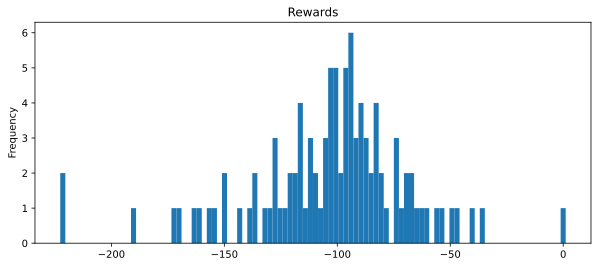

In [51]:
import matplotlib.pyplot as plt
import pandas as pd

fig, ax = plt.subplots(figsize = (10, 4))
ax.set_title("Rewards")
pd.Series(rewards).plot(kind='hist', bins=100)

plt.show()

## Let's see our agent in action 🎬

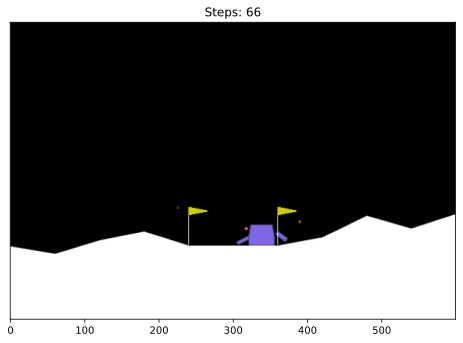

In [52]:
# Workaround for pygame error: "error: No available video device"
# See https://stackoverflow.com/questions/15933493/pygame-error-no-available-video-device?rq=1
# This is probably needed only for Linux
import os
os.environ["SDL_VIDEODRIVER"] = "dummy"
from src.viz import show_video

# Instead of calling env.seed(seed), use env.reset(seed=seed)
show_video(agent, env, sleep_sec=0.01, seed=12345)